In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [6]:
df.shape

(9965, 31)

In [7]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
V15,0.01
V16,0.01
Amount,0.01
V28,0.01
V27,0.01
V26,0.01
V25,0.01
V24,0.01
V23,0.01
V22,0.01


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9965.000000,9965.000000,9965.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,5934.484897,-0.241681,0.280693,0.906359,0.260247,-0.046342,0.132335,-0.071847,-0.065317,0.801220,-0.222004,0.765820,-1.269198,0.848447,0.699082,-0.127805,-0.008316,0.316889,-0.016717,-0.069244,0.027787,-0.052099,-0.152091,-0.033426,0.021638,0.087302,0.108328,0.005614,0.003051,62.968359,0.003814
std,4449.407112,1.522695,1.308882,1.156948,1.440500,1.183634,1.307586,1.077872,1.260140,1.156424,1.094805,1.169195,1.529064,1.213252,1.240232,0.975537,0.881598,0.965523,0.793982,0.807359,0.590531,0.914735,0.631310,0.488203,0.593818,0.428128,0.562661,0.411434,0.266532,184.626707,0.061641
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2061.000000,-1.012157,-0.208591,0.412198,-0.615591,-0.643060,-0.630075,-0.542336,-0.190495,0.069439,-0.687065,-0.064279,-2.367872,-0.020661,0.078687,-0.707414,-0.495795,-0.182177,-0.450869,-0.551038,-0.149775,-0.268191,-0.548412,-0.174222,-0.327438,-0.157704,-0.328193,-0.084489,-0.015751,5.000000,0.000000
50%,4547.000000,-0.372624,0.286179,0.943149,0.218492,-0.153090,-0.153577,-0.054658,0.012466,0.804930,-0.339972,0.746752,-1.616357,0.914859,0.898178,-0.007462,0.065802,0.296402,0.025779,-0.075870,-0.020930,-0.123101,-0.136078,-0.046009,0.079935,0.121180,0.043395,-0.004505,0.015904,15.950000,0.000000
75%,10163.000000,1.151506,0.900823,1.601871,1.119367,0.371762,0.503376,0.476280,0.273016,1.506066,0.174952,1.575650,0.086676,1.766764,1.497831,0.537830,0.546496,0.780910,0.459390,0.442998,0.156913,0.032707,0.247913,0.081288,0.410877,0.359418,0.478249,0.121045,0.077418,50.792500,0.000000
max,14864.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [12]:
#Checking the distribution of the classes

classes = df['Class'].value_counts()
classes

0.0    9926
1.0      38
Name: Class, dtype: int64

In [13]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.62

In [14]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.38

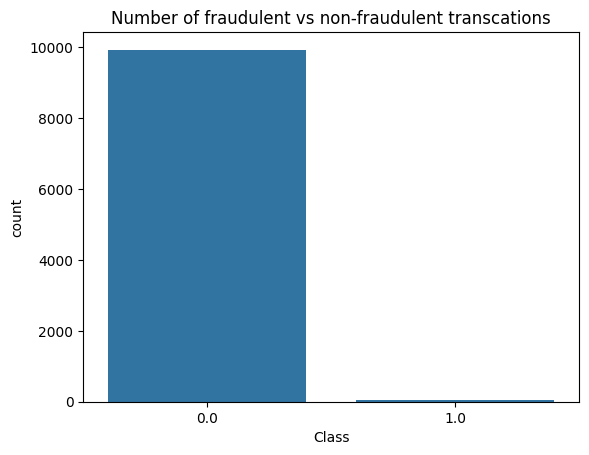

In [15]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

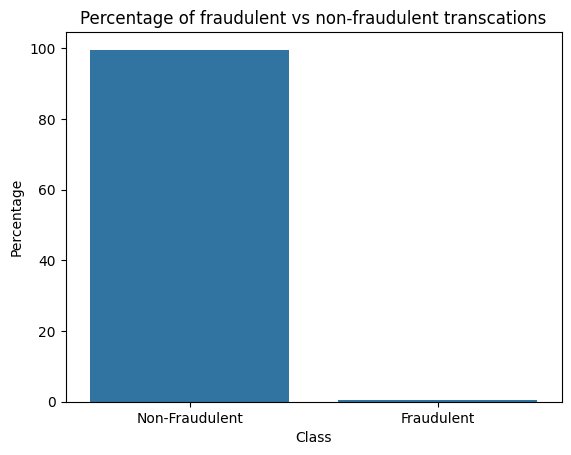

In [16]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

In [17]:
# Import library
from sklearn.model_selection import train_test_split

In [18]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [19]:
# Putting target variable to y
y = df['Class']

In [20]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [21]:
# Standardization method
from sklearn.preprocessing import StandardScaler
# Instantiate the Scaler
scaler = StandardScaler()
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [22]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7773,10825,-0.969311,1.253038,0.763504,-0.440930,0.267168,-0.526955,1.004812,-0.084375,0.534284,-0.691453,1.757790,-1.851848,1.758176,1.881346,-1.350296,0.464585,-0.185960,0.459745,-0.495209,-0.305830,-0.060217,0.061753,-0.101820,-0.028199,-0.197618,0.058140,-0.465951,-0.207689,-0.013913
5216,4999,-0.911366,0.297823,2.651417,0.419836,-0.073530,0.331379,-0.280878,0.470519,1.613713,-1.065355,1.714248,-2.332444,-0.233707,1.515066,-1.504890,0.119676,0.424803,0.500733,-1.100832,-0.252376,-0.015382,0.162375,-0.024227,0.114149,-0.291667,-0.621807,0.121418,0.123840,-0.254211
7287,9744,1.197942,0.002521,0.836837,0.178275,-0.710208,-0.692612,-0.365457,-0.123716,1.672953,-0.629369,1.211374,-2.161281,1.561615,1.641415,0.758472,-0.002883,0.773212,-0.682083,-0.658742,-0.135973,-0.230011,-0.401941,0.170277,0.398791,-0.030543,0.874491,-0.083610,0.004654,-0.260838
1361,1057,-1.441258,0.674872,2.685483,0.243826,-0.558726,0.764201,0.143656,0.054985,1.554454,0.063360,-1.622258,0.582455,0.566107,-1.805405,-1.737418,-0.770644,0.127248,-0.435649,0.900137,0.334172,-0.357498,-0.051798,-0.462233,-0.029358,0.418554,0.362262,-0.432949,-0.531989,-0.162335
8515,11431,-0.131729,0.240145,1.393248,-0.562343,0.103432,-0.874503,0.589436,-0.380287,1.938447,-0.983498,-0.040999,-2.436779,1.243836,0.937775,-1.784906,-0.328148,0.514820,-0.321074,-0.341494,-0.087143,-0.109418,0.251990,0.085535,0.397558,-1.107084,0.698552,-0.051746,-0.010261,-0.209208


In [23]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
61,41,1.138759,-1.192953,1.407131,-0.330070,-2.069503,-0.242175,-1.306635,0.104510,0.134628,0.493931,-0.895188,-0.182695,0.146081,-0.586611,0.797189,-0.891721,-0.079208,1.541588,-0.983586,-0.299307,-0.156198,-0.030569,-0.019723,0.433753,-0.029521,1.141241,-0.008612,0.041564,0.184001
2918,2466,1.116144,0.513875,0.866488,2.512308,-0.262168,-0.268716,-0.001428,0.064595,-0.637979,0.649981,-0.111485,-0.291906,-0.853557,0.498586,0.878753,0.426460,-0.205027,-0.925542,-1.397707,-0.244714,-0.208885,-0.690477,0.224231,0.331436,0.103843,-0.254106,0.004526,0.027106,-0.310757
6019,6760,1.106749,-0.443511,1.233067,0.419639,-1.258706,-0.407504,-0.742668,-0.022259,2.450776,-0.770871,0.211650,-2.332008,1.184763,1.104965,-0.375498,0.165127,0.690140,-0.039773,0.013611,-0.022122,-0.239373,-0.407701,0.027451,0.401553,0.049561,0.946797,-0.075390,0.019086,0.024676
7664,10626,-1.109963,0.104215,2.074489,-0.861887,0.566133,-1.377031,0.160790,-0.140725,1.052130,-1.314462,0.552149,-2.246445,2.196003,1.338347,-0.226039,0.537322,0.062002,-0.105992,-0.829709,0.120671,-0.133431,-0.431460,0.030979,0.385033,-0.126229,0.704831,-0.072160,0.094320,-0.231068
7471,10162,1.182880,0.051146,0.841107,0.018382,-0.500300,-0.286042,-0.415972,-0.024078,1.273732,-0.484618,2.969643,-0.988146,2.481741,1.632639,-0.043285,0.180945,0.422132,-0.270653,-0.327201,-0.078148,-0.180742,-0.224945,0.138876,0.236495,-0.007872,0.862932,-0.079217,-0.006461,-0.312735


In [24]:
# Listing the columns
cols = X_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

<ipython-input-25-9525078b1b14>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-25-9525078b1b14>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-25-9525078b1b14>:7: UserWarning: 

`distplot` is a deprecated function and will be removed 

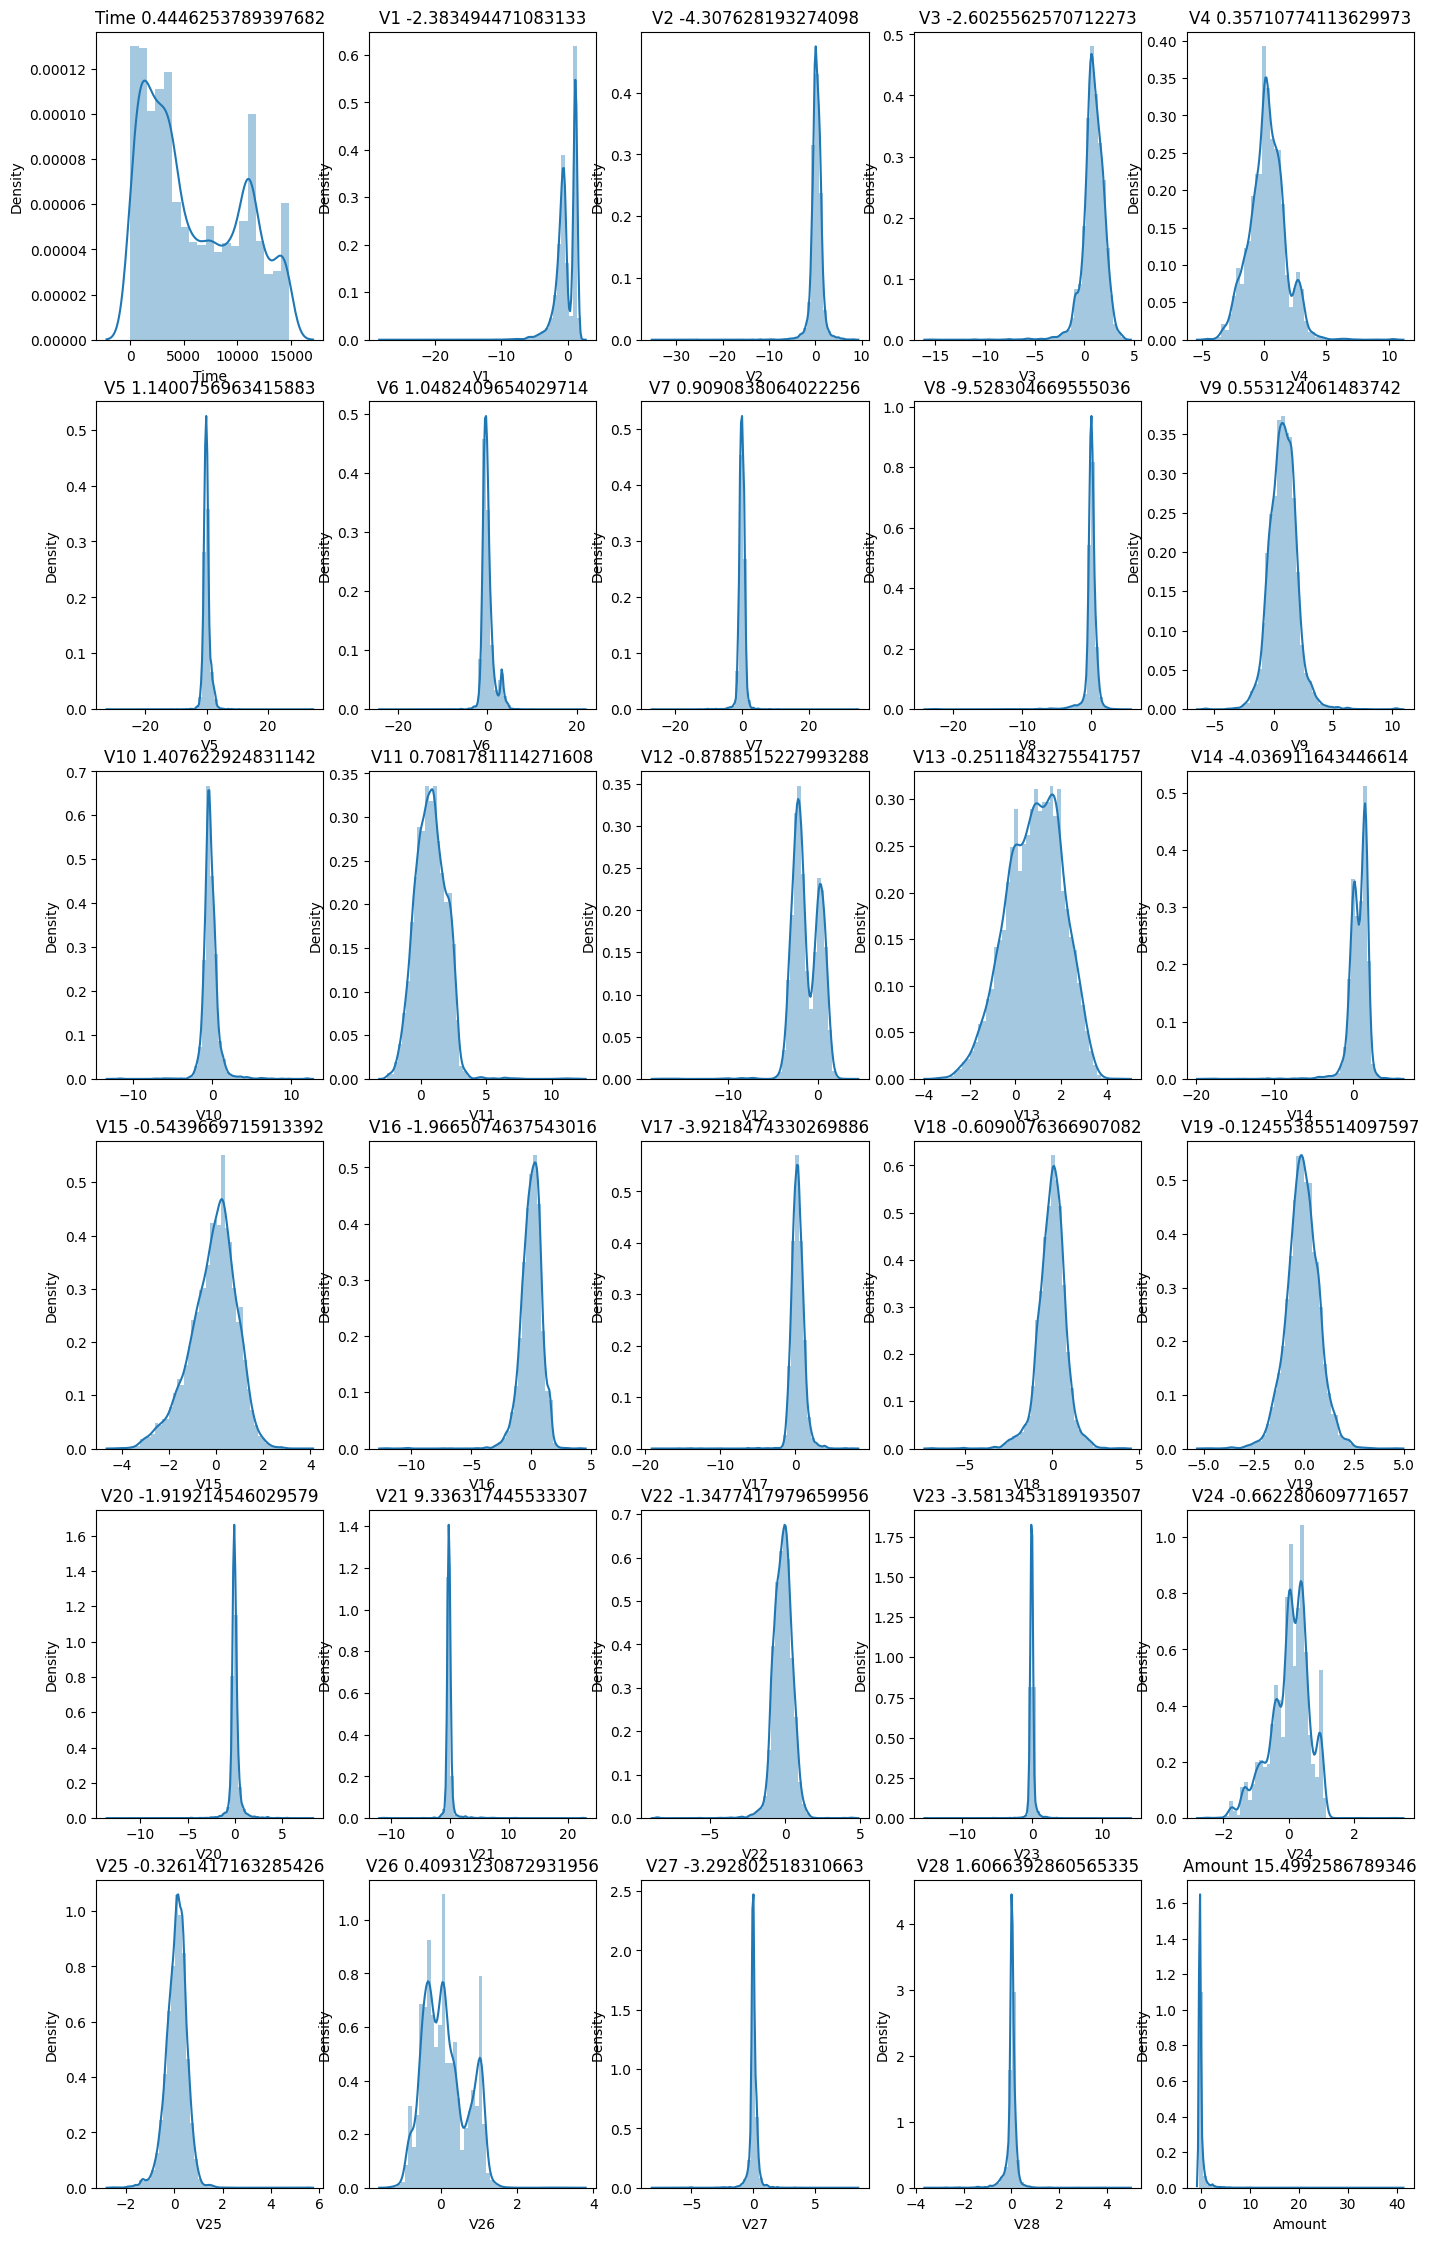

In [25]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))